## This file will visualize the data we prepared in `Get_face.ipynb`. Therefore, the proper way to run the process is by running `Get_face.ipynb`  first.  And then, run this file.

In [1]:
%matplotlib inline
%load_ext autoreload
from glob import glob
from skimage import io
from matplotlib import style
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp
from matplotlib.font_manager import FontProperties
import matplotlib
matplotlib.get_backend()
import joblib as jb
from IPython.display import SVG,display
import numpy as np
import matplotlib.pyplot as plt
#matplotlib.rcParams['backend'] = 'TkAgg' 

## Import data 

In [2]:
mod_images=pd.read_pickle('Data/new_data.pickle')
mod_images.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,70,80,82,72,58,58,60,63,54,58,...,182,183,136,106,116,95,106,109,82,0
1,151,150,147,155,148,133,111,140,170,174,...,108,95,108,102,67,171,193,183,184,0
2,231,212,156,164,174,138,161,173,182,200,...,138,152,122,114,101,97,88,110,152,2
3,24,32,36,30,32,23,19,20,30,41,...,126,132,132,133,136,139,142,143,142,4
4,4,0,0,0,0,0,0,0,0,0,...,34,31,31,31,27,31,30,29,30,6


In [3]:
#label_dict={0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
from __future__ import unicode_literals
label_dict={0:['Angry',u'\U0001f620'],1:['Disgust',u'\U0001f641'],2:['Fear',u'\U0001f628'],\
            3:['Happy',u'\U0001f604'],4:['Sad',u'\U0001f622'],5:['Surprise',u'\U0001f632'],\
            6:['Neutral',u'\U0001f610']}
print('Here is the label.')
display(label_dict)
def print_image(x,ax,data=mod_images,cmap='gray'):
    '''
    This function will print a flatten array from `data`. 
    `x` is the index of a row from `data`. It is the location of an individual image.
    '''
    img=data.iloc[x,:2304].values.reshape(48,-1)
    label=label_dict[data.iloc[x,-1]]
    ax.imshow(img,cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('{} : {}'.format(label[0],label[1]),\
                  color='blue',fontname='DejaVu Sans',fontsize=15)
    ax.set_aspect('equal')
    #return np.array(img11,dtype='int')

Here is the label.


{0: ['Angry', '😠'],
 1: ['Disgust', '🙁'],
 2: ['Fear', '😨'],
 3: ['Happy', '😄'],
 4: ['Sad', '😢'],
 5: ['Surprise', '😲'],
 6: ['Neutral', '😐']}

## Plot images with labels

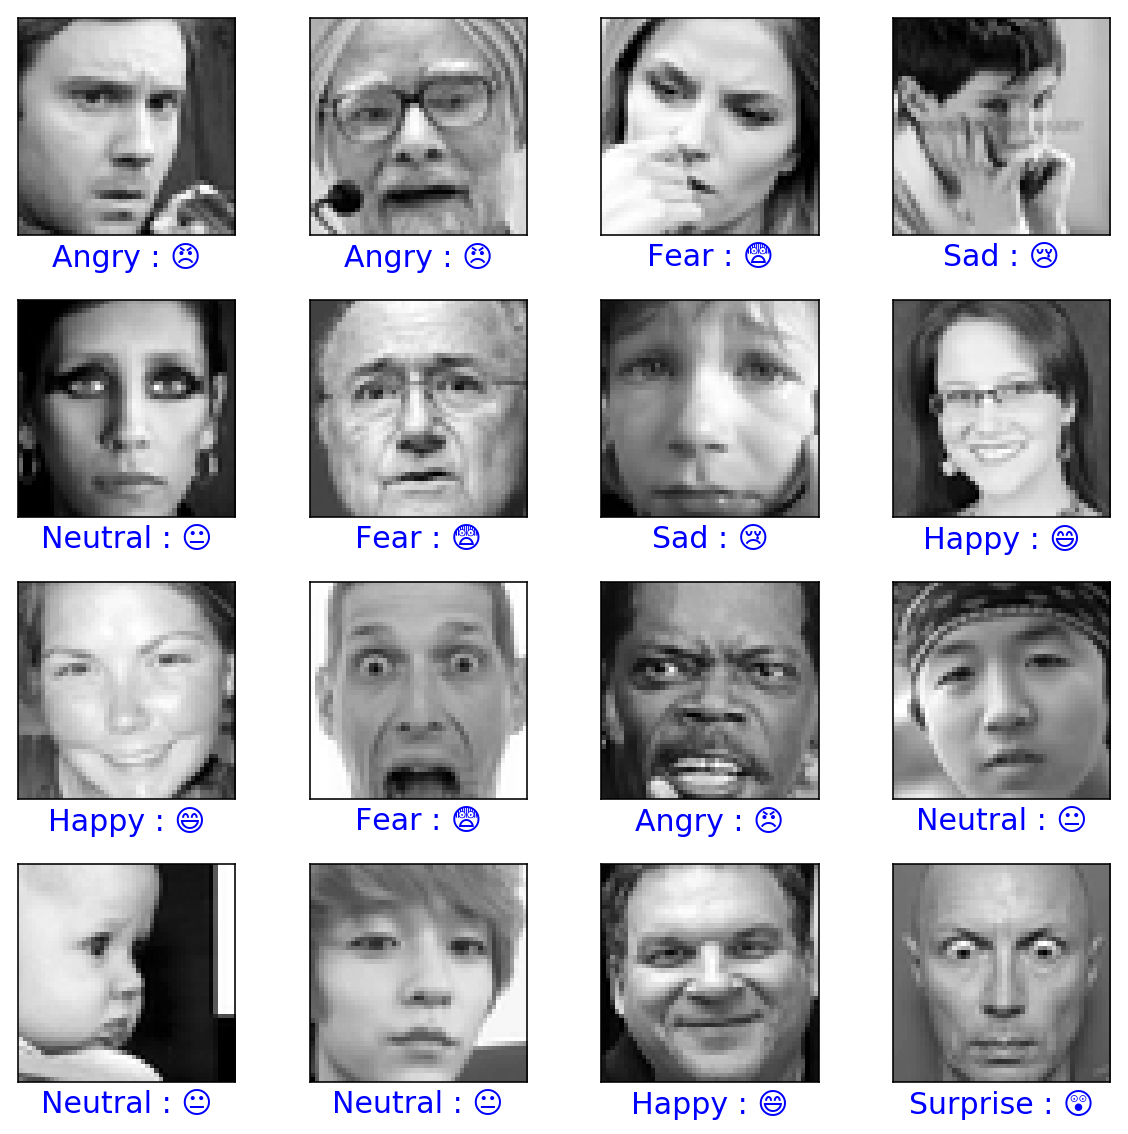

In [4]:
#ed_flist=glob('images1/images1/*')
flist=glob('images1/*')
fig,ax=plt.subplots(4,4,figsize=(8,8))
ax=ax.ravel()
for i in range(16):
    print_image(x=i,ax=ax[i])
plt.tight_layout()

fig.subplots_adjust(hspace=0.3,wspace=0.3)
#fig.savefig('Images/original_data.png')

## Drop `Disgust` Category due to the small volume compared to the rest of the categories

In [5]:
mod_images_1=mod_images[mod_images.iloc[:,-1] != 1]

## Save the new dataframe as pickle using `pd.Dataframe.to_pickle`

In [6]:
mod_images_1.to_pickle('Data/mod_images_dropDigust.pickle')